In [10]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# nltk.downloader.download('vader_lexicon')
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split
# nltk.download('wordnet')

In [2]:
# import data
raw_data =  pd.read_csv('../raw-data/skills_test.csv')

In [3]:
# have a look at some text
raw_data['Text'].head()

0    I bought a car through a dealership and had so...
1    April 7, 2006 Wells Fargo Bank announced they ...
2    Securities watchdog investigates Wells Fargo o...
3    I had a problem where for months my student lo...
4    If someone opens a bank account without your k...
Name: Text, dtype: object

In [4]:
def clean_text(s):
    """
    Pre-process text data by removing stop words, puncuation and strange characters
    
    return string
    """
#     lemma = WordNetLemmatizer()
    symbols_re = re.compile('[^a-z #+_]')
    space_re = re.compile('[/(){}\[\]\|@,;]')
    s = s.translate(str.maketrans('', '', string.punctuation))
    s = s.lower()
    s = symbols_re.sub('', s)
    s = space_re.sub(' ', s)
    s = ' '.join([l for l in s.split() if l not in stopwords.words('english')])
#     normalized = " ".join(lemma.lemmatize(word) for word in s.split())
#     return normalized
    return s

In [5]:
raw_data['Text'] = raw_data['Text'].apply(clean_text)

## Frequent terms

In [4]:
vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 1), max_features=None, stop_words = 'english' )
vectorizer.fit(raw_data['Text'])
vect_sentences  = vectorizer.transform(raw_data['Text'])
sum_words = vect_sentences.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words = sorted(words_freq, key=lambda x: x[1])

In [5]:
label = [l[0] for l in words[-30:]]
value = [v[1] for v in words[-30:]]

Text(0.5, 1.0, 'Number of 2-grams in text')

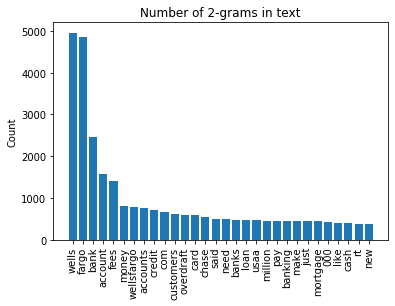

In [7]:
plt.bar(label[::-1],value[::-1])
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Number of 2-grams in text')
# plt.ylim([150,])

In [11]:
vectorizer = CountVectorizer(analyzer='word', ngram_range=(2, 2), max_features=None, stop_words = 'english' )
vectorizer.fit(raw_data['Text'])
vect_sentences  = vectorizer.transform(raw_data['Text'])
sum_words = vect_sentences.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words = sorted(words_freq, key=lambda x: x[1])

In [12]:
label = [l[0] for l in words[-30:]]
value = [v[1] for v in words[-30:]]

Text(0.5, 1.0, 'Number of 2-grams in text')

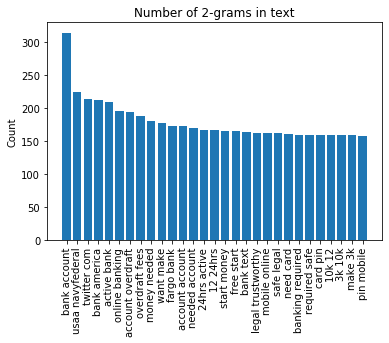

In [14]:
plt.bar(label[::-1][1:],value[::-1][1:])
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Number of 2-grams in text')
# plt.ylim([150,])

In [15]:
vectorizer = CountVectorizer(analyzer='word', ngram_range=(3, 3), max_features=None, stop_words = 'english' )
vectorizer.fit(raw_data['Text'])
vect_sentences  = vectorizer.transform(raw_data['Text'])
sum_words = vect_sentences.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words = sorted(words_freq, key=lambda x: x[1])

In [16]:
label = [l[0] for l in words[-30:]]
value = [v[1] for v in words[-30:]]

Text(0.5, 1.0, 'Number of 2-grams in text')

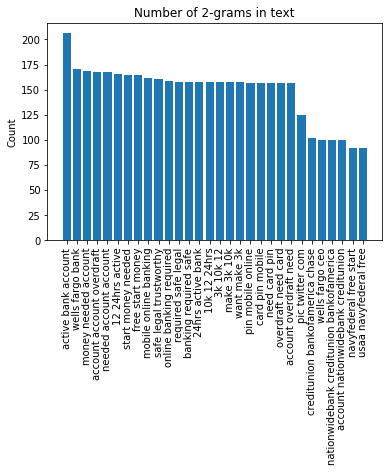

In [17]:
plt.bar(label[::-1],value[::-1])
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Number of 3-grams in text')
# plt.ylim([150,])

## Sentiment analysis

In [18]:
sia = SentimentIntensityAnalyzer()

In [19]:
collected_sentiment = raw_data['Text'].apply(lambda x: sia.polarity_scores(x))

In [52]:
raw_data['sentiment'] = collected_sentiment.apply(lambda x: x['compound'])

(array([221., 327., 219., 237., 293., 186., 506., 425., 709., 705.]),
 array([-0.9951 , -0.79572, -0.59634, -0.39696, -0.19758,  0.0018 ,
         0.20118,  0.40056,  0.59994,  0.79932,  0.9987 ]),
 <a list of 10 Patch objects>)

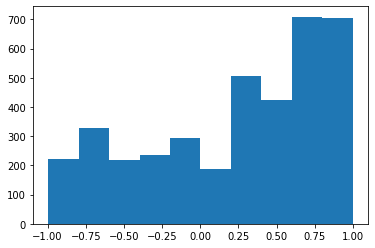

In [25]:
plt.hist(collected_sentiment.apply(lambda x: x['compound']))

In [47]:
sia.polarity_scores(
    "I took my accts out of Wells Fargo a year ago.  I deal w a credit union now.  I'm very happy...much fairer fees too.")

{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.5574}

## Topic Extraction

In [6]:
no_features = 1000

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(raw_data['Text'])
tf_feature_names = tf_vectorizer.get_feature_names()

In [7]:
lda = LatentDirichletAllocation(n_components=10,
                                max_iter=5, 
                                random_state=0).fit(tf)

In [8]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
wells fargo credit card fees bank atm like account cards
Topic 1:
bank wellsfargo account money chase active need usaa bankofamerica make
Topic 2:
wells fargo account fees bank loan accounts customers checking money
Topic 3:
bank suntrust pnc account navyfederal tdbank wellsfargo make bancorpsouth money
Topic 4:
bank usaa chase harrisbank fees cash tdbank overdraft america need
Topic 5:
wells fargo xxxx bank april new tags chase share auto
Topic 6:
wells fargo bank million said accounts financial year banks sales
Topic 7:
wells fargo fees bank pay said tax banks going like
Topic 8:
wells fargo money service customer check fees im like rate
Topic 9:
wells fargo rt wellsfargo cash bank app ceo customers accounts


In [12]:
x = raw_data['Text']
y = raw_data['label']
text_train, text_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## K-means

In [61]:
document = [T for T in raw_data['Text']]

In [62]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(document)

In [71]:
true_k = 6
clf = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
data = clf.fit(X)
centroids = clf.cluster_centers_

In [72]:
print("Top terms per cluster:")
order_centroids = clf.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
print("\n")

Top terms per cluster:
Cluster 0:
 wells
 fargo
 bank
 fees
 wellsfargo
 account
 money
 chase
 usaa
 need
Cluster 1:
 cash
 app
 square
 appsquare
 cardsquare
 codesquare
 apple
 moneysquare
 androidsquare
 customer
Cluster 2:
 bank
 coin
 wells
 walmart
 fargo
 closings
 ge
 healthcare
 maggiejordanacn
 carrier
Cluster 3:
 wells
 fargo
 bank
 fees
 accounts
 customers
 said
 million
 credit
 banks
Cluster 4:
 wells
 account
 fargo
 fees
 xxxx
 checking
 bank
 money
 overdraft
 fee
Cluster 5:
 auto
 loan
 loans
 car
 credit
 bad
 refinance
 refinancing
 rates
 bank




In [42]:
tsne_init = 'pca'  # could also be 'random'
tsne_perplexity = 20.0
tsne_early_exaggeration = 4.0
tsne_learning_rate = 1000
random_state = 0

In [43]:
model = TSNE(n_components=2, random_state=random_state, init=tsne_init, perplexity=tsne_perplexity,
         early_exaggeration=tsne_early_exaggeration, learning_rate=tsne_learning_rate)

In [47]:
# transformed_centroids = model.fit_transform(centroids)
transformed_words = model.fit_transform(X.toarray())

In [57]:
true_k = 1
clf = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
data = clf.fit(transformed_words)
centroids = clf.cluster_centers_
y_kmeans = clf.predict(transformed_words)

In [58]:
centers = clf.cluster_centers_

[[ 3.0131145e+03  8.6736174e-19]
 [-3.0131145e+03  8.6736174e-19]]


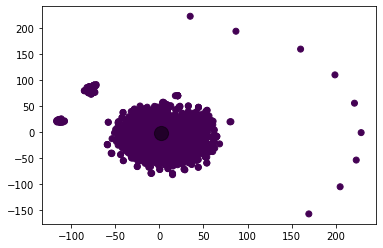

In [59]:
print(transformed_centroids)
# plt.scatter(transformed_centroids[:, 0], transformed_centroids[:, 1], marker='x')
plt.scatter(transformed_words[:, 0], transformed_words[:, 1], marker='o', c=y_kmeans)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
# plot individual data points
plt.show()